Start date,2015-05-06
End date,2017-03-01
Total months,21
,Backtest
Annual return,95.852%
Cumulative returns,225.11%
Annual volatility,47.053%
Sharpe ratio,1.67
Calmar ratio,3.06
Stability,0.86
Max drawdown,-31.369%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,31.37,2017-01-04,2017-01-11,NaT,NaN
1,24.80,2016-01-07,2016-02-03,2016-06-13,113
2,24.12,2015-07-10,2015-08-24,2015-10-23,76
3,23.65,2015-11-04,2015-11-11,2015-12-11,28
4,23.51,2016-06-16,2016-08-02,2016-11-21,113


Stress Events,mean,min,max
EZB IR Event,0.35%,-5.28%,3.96%
Apr14,0.00%,0.00%,0.00%
Oct14,0.00%,0.00%,0.00%
Fall2015,-0.21%,-12.33%,6.02%
Recovery,0.28%,-28.93%,23.27%
New Normal,0.34%,-23.30%,26.92%


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


KeyError: 'EZB IR Event'

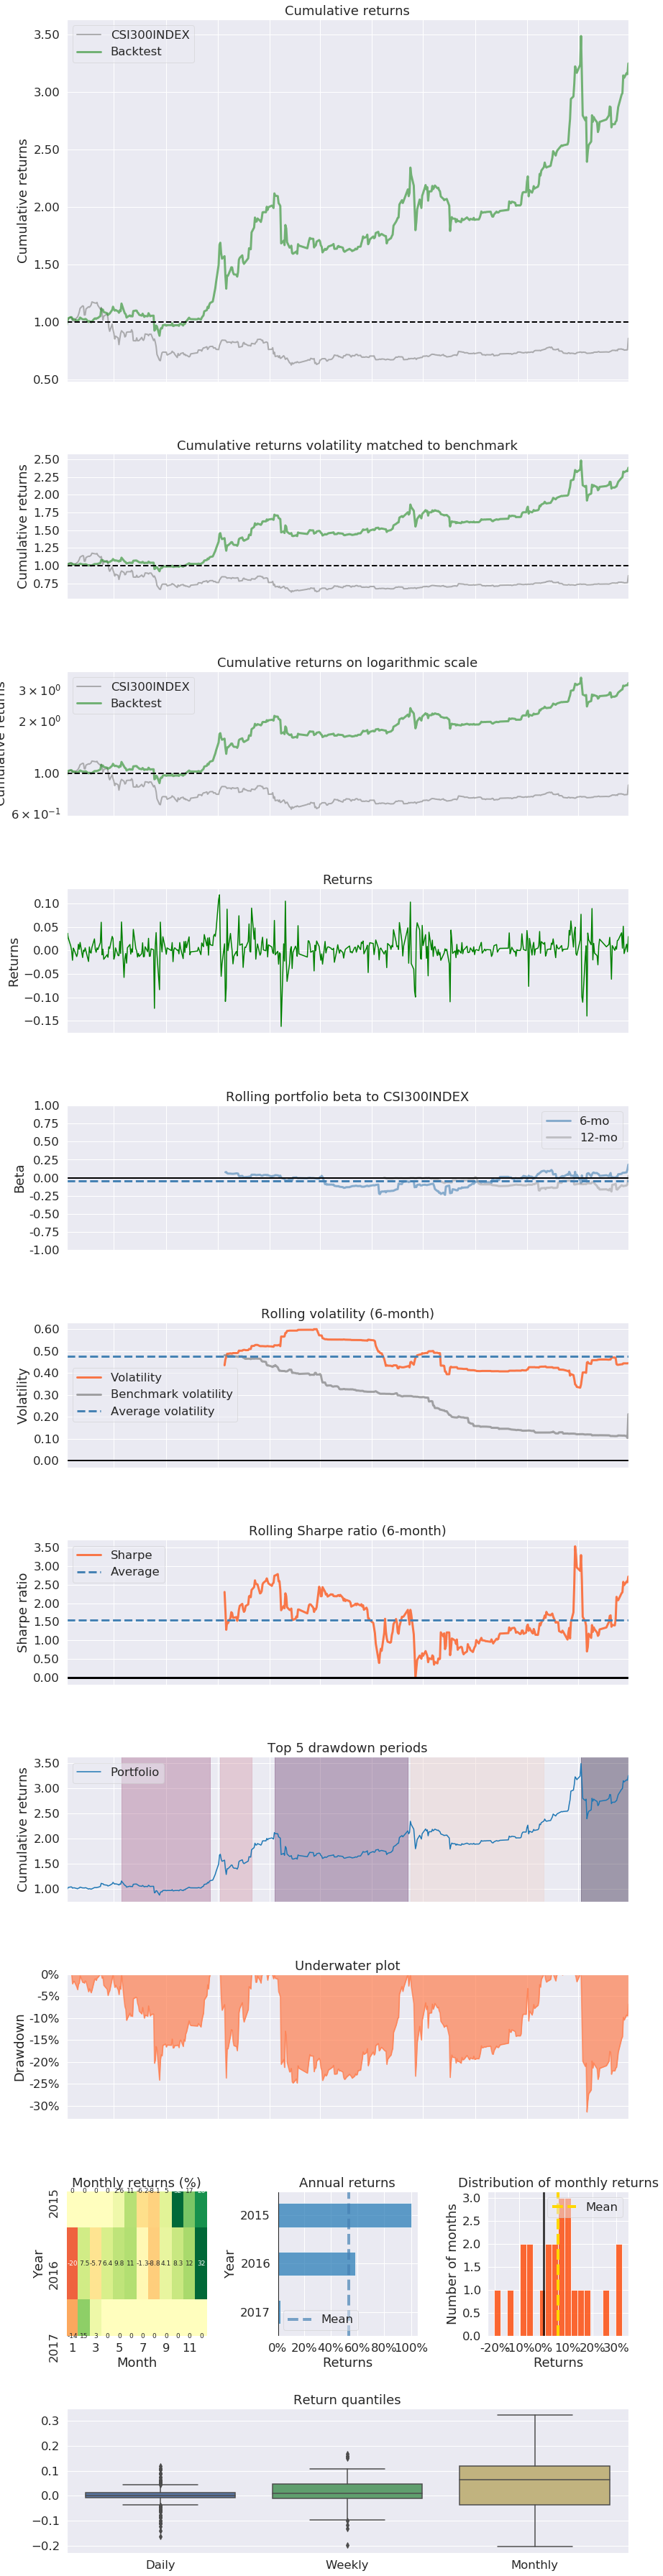

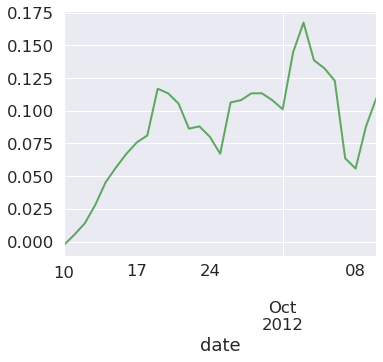

In [11]:
import pyfolio as pf
import pandas as pd
import numpy as np
#import datetime
from dateutil.parser import parse
import matplotlib.pyplot as plt
%matplotlib inline
returns_df = pd.read_csv('bitcoin_strategy_returns.csv')
returns_df['date2']= returns_df['date'].apply(lambda x: parse(x))
returns_df = returns_df.drop('date', axis = 1)
returns_df = returns_df.rename(columns = {'date2': 'date'})
returns_df = returns_df.set_index('date')
returns = returns_df['returns']
returns.head()
positions = pd.read_csv('bitcoin_strategy_positions.csv')
transactions = pd.read_csv('bitcoin_strategy_transactions.csv')
positions['date2']= positions['date'].apply(lambda x: parse(x))
positions = positions.drop('date', axis = 1)
positions = positions.rename(columns = {'date2': 'date'})
positions = positions.set_index('date')
transactions['date2']= transactions['date'].apply(lambda x: parse(x))
transactions = transactions.drop('date', axis = 1)
transactions = transactions.rename(columns = {'date2': 'date'})
transactions = transactions.set_index('date')
# benchmark = pd.read_csv('000300_2015_05.csv')
# benchmark['Date'] = pd.to_datetime(benchmark['Date'],format="%Y-%m-%d")
# benchmark_index = benchmark.set_index(['Date'])
# benchmark_rets = np.diff(benchmark_index['Close']) / benchmark_index['Close'][:-1]
# benchmark_rets.rename('CSI300INDEX', inplace = True) 
# benchmark_rets = benchmark_rets.tz_localize('UTC')
#oos_date = '2020-03-01'
factors_returns = pd.read_csv('F-F_Research_Data_Factors_Daily.csv')
factors_returns['date']= factors_returns['Unnamed: 0'].apply(lambda x: parse(x))
factors_returns = factors_returns.drop('Unnamed: 0', axis = 1)
factors_returns = factors_returns.set_index('date')
factor_partitions = {'style': ['Mkt-RF', 'SMB', 'HML']}
factor_loading = factors_returns.copy()

pf.create_full_tear_sheet(returns,
                          positions=positions,
                          transactions=transactions,
                          factors_returns=factors_returns,
                          factor_partitions=factor_partitions
                          #benchmark_rets = benchmark_rets
                         )


In [14]:
import numpy as np
import statsmodels.api as sm
def cal_factors_loading(dataframe):
    factors_loading = {'Mkt-RF': [], 'SMB': [], 'HML': []}
    x = np.column_stack((dataframe['Mkt-RF'], dataframe['SMB'], dataframe['HML']))
    y = dataframe['R-returns']
    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()
    factors_loading['Mkt-RF'].append(model.params['x1'])
    factors_loading['SMB'].append(model.params['x2'])
    factors_loading['HML'].append(model.params['x3'])
    return factors_loading
factors_returns = pd.read_csv('F-F_Research_Data_Factors_Daily.csv')
factors_returns['date']= factors_returns['Unnamed: 0'].apply(lambda x: parse(x))
factors_returns = factors_returns.drop('Unnamed: 0', axis = 1)
factors_returns = factors_returns.set_index('date')
factor_partitions = {'style': ['Mkt-RF', 'SMB', 'HML']}
factor_loading = factors_returns.copy()
factor_loading['returns'] = returns
factor_loading['R-returns'] =  factor_loading['returns'] - factor_loading['RF']
factor_loading = factor_loading.dropna()
factor_loading['factor_loading'] = factor_loading.

,Mkt-RF,SMB,HML,RF,returns,R-returns
date,,,,,,
1926-07-01 00:00:00+00:00,0.10,-0.24,-0.28,0.009,NaN,NaN
1926-07-02 00:00:00+00:00,0.45,-0.32,-0.08,0.009,NaN,NaN
1926-07-06 00:00:00+00:00,0.17,0.27,-0.35,0.009,NaN,NaN
1926-07-07 00:00:00+00:00,0.09,-0.59,0.03,0.009,NaN,NaN
1926-07-08 00:00:00+00:00,0.21,-0.36,0.15,0.009,NaN,NaN
